In [1]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
categories = [item for item in os.listdir('images') if os.path.isdir('images/'+item)]
categories

['usa',
 'south_america',
 'russia',
 'australia',
 'southeast_asia',
 'africa_europe',
 'central_america',
 'canada']

In [3]:
# Helper fn's
def plot_image(img):
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

def plot_hist(title, img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    # plot the histogram
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    

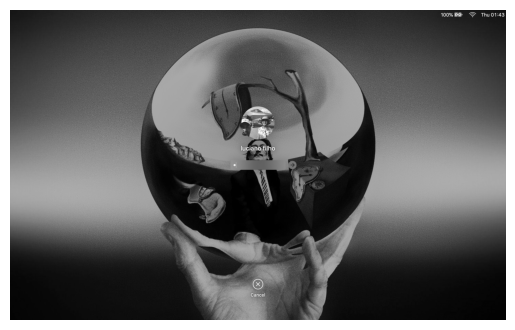

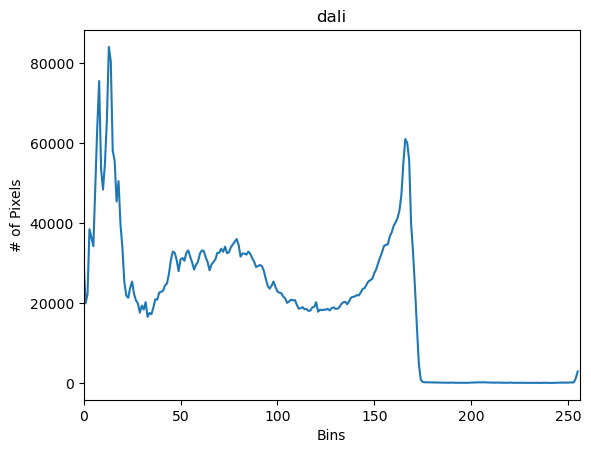

In [54]:
img = cv2.imread('dali.png', cv2.IMREAD_GRAYSCALE)
plot_image(img)
plot_hist('dali',img)

In [ ]:
'''
    Infrarred wavelength goes from 10.0 to 13.4 micrometers.
    
    Inference Assumptions:
    
    We can either assume that 0 pixel values corresponds to 10.0 micrometers and 
    pixel values near 255 corresponds to 13.4 micrometers. Another way is assuming that 0 pixel values
    corresponds to 10.0 micrometers. We will assume the first.
    
    The energy in joules from a photon can be obtained from the formula E=h*v. 
    Where h corresponds to the Planck's constant: h = 6.62607015e−34 joule * s, 
    and v to the frequency = c/wavelength (lambda). 

    Considering:
    v = (299792458 m/s / 13.40e-06 m) = 22372571.4925 x 1.0e06 * 1/s
    then:
    E = 6.62607015e−34 * joule * s * 22372571.4925 x 1.0e06 * 1/s
    E = 148242228.145442440298507e-28 joule. 


    Data acquired October 1, 1994 - March 31, 1995 - See https://visibleearth.nasa.gov/images/55167/earths-city-lights
    
    TODO: 
    1 - Check the calculations above for mistakes[].
    2 - How many photons could we assume that a pixel can contain?
    3 - How many joules of energy could we assume that was truly generated in the 
    moment of the collection of this sample?  
    4 - Linear regression over the amount of energy that a pixel can contain based on the 
    L1 between our estimations against some energy source data from eua in the current period (October 1, 1994 - March 31, 1995). 
        

'''


Image Size: (884, 1474)
Image Size: (1551, 1310)
Image Size: (944, 1369)
Image Size: (666, 1264)
Image Size: (675, 1222)
Image Size: (1876, 1320)
Image Size: (280, 1474)
Image Size: (740, 2082)


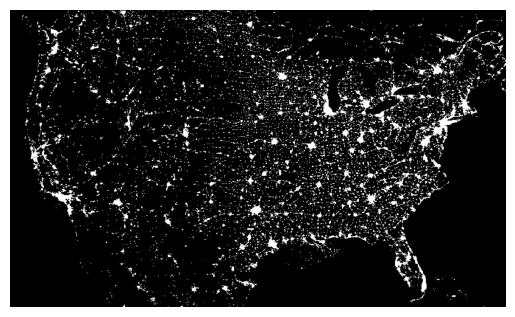

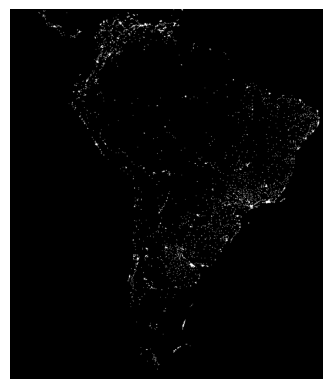

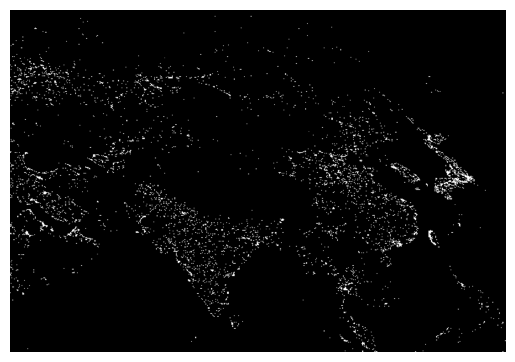

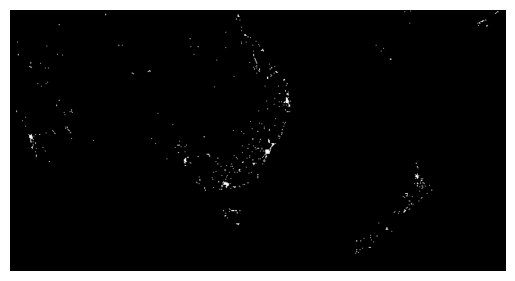

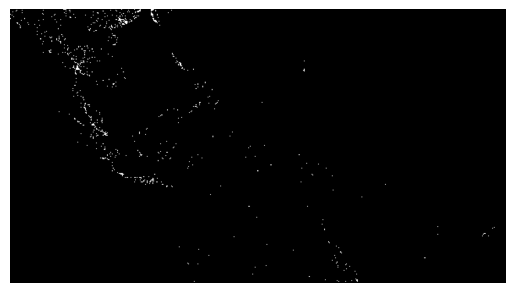

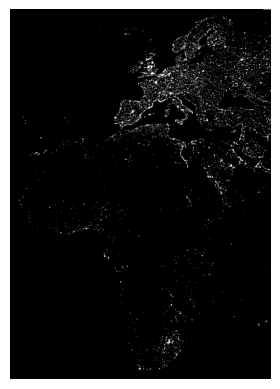

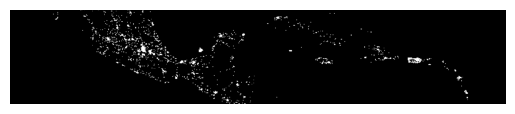

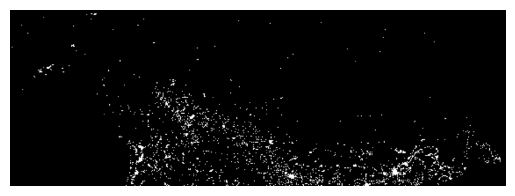

In [7]:
pixel_cnt = []
for dir in categories:
    for img in os.listdir('images/'+dir):

        img = cv2.imread('images/'+dir+'/'+img, cv2.IMREAD_UNCHANGED)
        print('Image Size:', img.shape)
        plot_image(img)
        
        img_tensor = torch.from_numpy(img.astype(float))
        
        image_flat = img_tensor.view(-1)
        
        pixel_cnt.append(torch.sum(img_tensor)/255)

total = sum(pixel_cnt)
normalized_values = [(v/total)  for v in pixel_cnt]

In [16]:
for i,region in enumerate(categories):
    print(region, '%.3f' % (100 * normalized_values[i].item()),'%') 

usa 43.098 %
south_america 7.393 %
russia 11.008 %
australia 1.224 %
southeast_asia 1.484 %
africa_europe 18.846 %
central_america 3.051 %
canada 13.896 %
